<a href="https://colab.research.google.com/github/Antara999333/Assignment_8/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I have used the CLIP model for this assignment

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Assignment_7_AIPI"  # Change to your repo name
git_path = 'https://github.com/Antara999333/Assignment_8.git'  # Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'  # Change this if your notebook is in a different folder
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


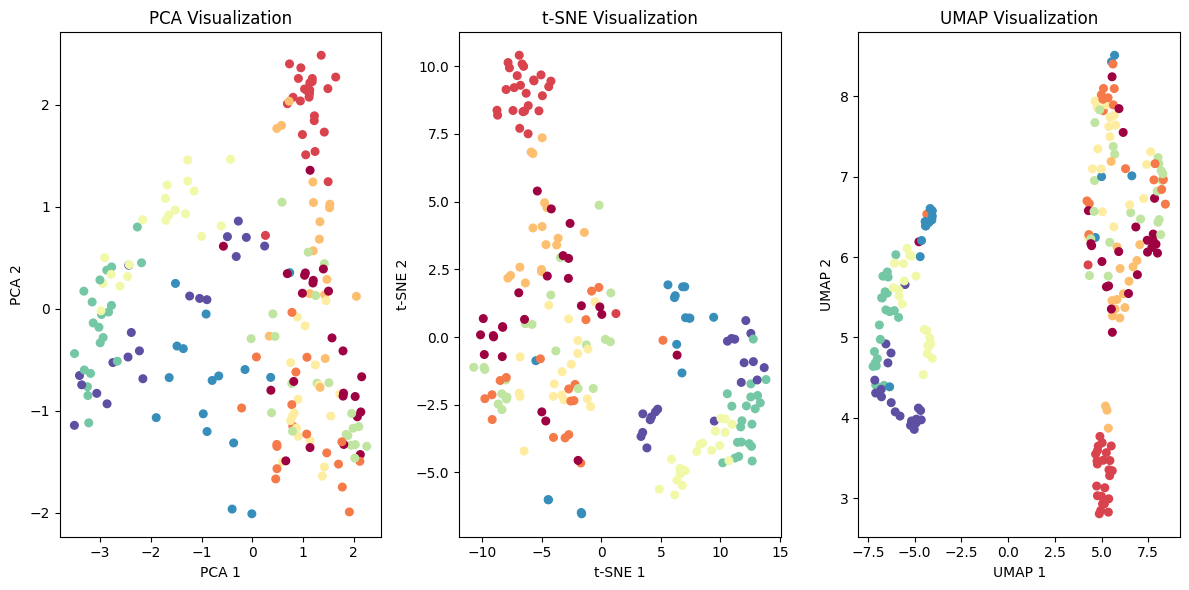

In [21]:

!pip install torch torchvision transformers datasets umap-learn matplotlib seaborn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from transformers import CLIPModel
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Load
transform = transforms.Compose([transforms.ToTensor()])
small_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
small_dataset = Subset(small_dataset, range(200))
dataloader = DataLoader(small_dataset, batch_size=16, shuffle=True)

# CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
model.to('cuda')  # Move to GPU for faster processing


def get_embeddings(dataloader):
    model.eval()
    embeddings = []
    labels = []

    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to('cuda')  # Move images to GPU
            images = images.repeat(1, 3, 1, 1)  # Convert grayscale to RGB
            images = torch.nn.functional.interpolate(images, size=(224, 224))  # Resize images
            outputs = model.get_image_features(images)
            embeddings.append(outputs.cpu())  # Move outputs back to CPU
            labels.append(targets)

    embeddings = torch.cat(embeddings, dim=0)
    labels = torch.cat(labels, dim=0)

    return embeddings.numpy(), labels.numpy()


embeddings, labels = get_embeddings(dataloader)

# Visualizing with PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='Spectral', s=30)
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualizing with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings)

plt.subplot(1, 3, 2)
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='Spectral', s=30)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Visualizing with UMAP
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embeddings_umap = umap_reducer.fit_transform(embeddings)

plt.subplot(1, 3, 3)
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='Spectral', s=30)
plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()


# COMPARISON BETWEEN THE APPROACHES :
## 1. PCA:
The first two PCs capture a significant portion of the variance, but the clusters are not well-separated. This suggests that the underlying structure of the data may not be linearly separable and that linear methods may not be the best choice for this dataset.

## 2 . t-SNE:
The clusters are more distinct in the t-SNE plot, indicating that non-linear methods can better capture the underlying structure of the data.

## UMAP 3:
 This visualization shows even more distinct clusters than t-SNE, suggesting that UMAP is able to capture the underlying structure of the data more effectively.Therefore, it may be the best method for this dataset.


# Sources:
I used the help of AI to debug the code and generate plots